In [ ]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [20]:
#Read in the csv file and convert to a Pandas dataframe
happiness_df = {'2015' : pd.read_csv("Data/2015.csv"),
                '2016' : pd.read_csv("Data/2016.csv"),
                '2017' : pd.read_csv("Data/2017.csv"),
                '2018' : pd.read_csv("Data/2018.csv"),
                '2019' : pd.read_csv("Data/2019.csv")}

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [11]:
happiness_df["2015"].head()
happiness_df["2016"].head()
happiness_df["2017"].head()
happiness_df["2018"].head()
happiness_df["2019"].head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [12]:
happiness_df["2015"].info()
happiness_df["2016"].info()
happiness_df["2017"].info()
happiness_df["2018"].info()
happiness_df["2019"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [13]:
happiness_df["2015"].shape
happiness_df["2016"].shape
happiness_df["2017"].shape
happiness_df["2018"].shape
happiness_df["2019"].shape

(156, 9)

In [14]:
happiness_df["2015"].columns
happiness_df["2016"].columns
happiness_df["2017"].columns
happiness_df["2018"].columns
happiness_df["2019"].columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [7]:
#kaggle (no source or collection method mentioned)
#but since our source is bootcamp ---> kaggle, it should be reliable

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [8]:
#2019 was the last update we found on the data given to us by kaggle. 

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [15]:
display(happiness_df["2015"].head(2))
display(happiness_df["2016"].head(2))
display(happiness_df["2017"].head(2))
display(happiness_df["2018"].head(2))
display(happiness_df["2019"].head(2))

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [21]:
happiness_df["2019"] = happiness_df["2019"].rename(columns={"Country or region":'Country',
                                                            "rank":"Happiness Rank",
                                                            "Score":"Happiness Score",
                                                            "GDP per capita":"Economy (GDP per Capita)",
                                                            "Family":"Social support",
                                                            "Healthy life expectancy":"Health (Life Expectancy)",
                                                            "Freedom":"Freedom to make life choices",
                                                            "Perceptions of corruption":"Trust (Government Corruption)"})

happiness_df["2018"] = happiness_df["2018"].rename(columns={"Country or region":'Country',
                                                            "rank":"Happiness Rank",
                                                            "Score":"Happiness Score",
                                                            "GDP per capita":"Economy (GDP per Capita)",
                                                            "Family":"Social support",
                                                            "Healthy life expectancy":"Health (Life Expectancy)",
                                                            "Freedom":"Freedom to make life choices",
                                                            "Perceptions of corruption":"Trust (Government Corruption)"})

happiness_df["2017"] = happiness_df["2017"].rename(columns={"Happiness.Rank":'Happiness Rank',
                                                            "Happiness.Score":'Happiness Score',
                                                            "Economy..GDP.per.Capita.":'Economy (GDP per Capita)',
                                                            "Family":"Social support",
                                                            "Health..Life.Expectancy.":"Health (Life Expectancy)",
                                                            "Freedom":"Freedom to make life choices",
                                                            "Trust..Government.Corruption.":"Trust (Government Corruption)"})



happiness_df["2016"] = happiness_df["2016"].rename(columns={"Family":"Social support",
                                                           "Freedom":"Freedom to make life choices"})

happiness_df["2015"] = happiness_df["2015"].rename(columns={"Family":"Social support",
                                                           "Freedom":"Freedom to make life choices"})

In [22]:
display(happiness_df["2015"].head(2))
display(happiness_df["2016"].head(2))
display(happiness_df["2017"].head(2))
display(happiness_df["2018"].head(2))
display(happiness_df["2019"].head(2))

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption),Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption)
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [ ]:
#possibly (standard error, confidence intervals, whiskers),
#but they might be useful for accuracy later on,
#so i think we should keep them for now

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [23]:
happiness_df["2015"].duplicated().sum()
happiness_df["2016"].duplicated().sum()
happiness_df["2017"].duplicated().sum()
happiness_df["2018"].duplicated().sum()
happiness_df["2019"].duplicated().sum()

0

In [ ]:
# go to delete duplicates columns
#no duplicated columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [25]:
#Display number missing values per column
happiness_df["2015"].isnull().sum().sort_values(ascending = False)
happiness_df["2016"].isnull().sum().sort_values(ascending = False)
happiness_df["2017"].isnull().sum().sort_values(ascending = False)
happiness_df["2018"].isnull().sum().sort_values(ascending = False)
happiness_df["2019"].isnull().sum().sort_values(ascending = False)
happiness_df["2018"][happiness_df["2018"]['Trust (Government Corruption)'].isnull()]

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption)
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [26]:
happiness_df["2018"][happiness_df["2018"]['Trust (Government Corruption)'].isnull()]

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption)
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [ ]:
# go to clean them (1 null value in 2018 UAE)

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [34]:
# check columns types 
happiness_df["2015"].dtypes
happiness_df["2016"].dtypes
happiness_df["2017"].dtypes
happiness_df["2018"].dtypes
happiness_df["2019"].dtypes

Overall rank                       int64
Country                           object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Social support                   float64
Health (Life Expectancy)         float64
Freedom to make life choices     float64
Generosity                       float64
Trust (Government Corruption)    float64
dtype: object

In [ ]:
# go to clean them 

In [35]:
# check outliers 
# i dont think head helps much in finding outliers, its better to draw
# but since we used head in usecase1 i will also do it here.
happiness_df["2015"].head(2)
happiness_df["2016"].head(2)
happiness_df["2017"].head(2)
happiness_df["2018"].head(2)
happiness_df["2019"].head(2)

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [ ]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [29]:
#we already checked that uae is the null problem
happiness_df["2018"][happiness_df["2018"]['Trust (Government Corruption)'].isnull()]

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption)
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [30]:
#since we know UAE is the problem, rather than taking forward or backward
#its better to take its value in all other years and get the mean
UAE_corruption_2015 = happiness_df["2015"][happiness_df["2015"]['Country'] == "United Arab Emirates"]['Trust (Government Corruption)'].sum()
UAE_corruption_2016 = happiness_df["2016"][happiness_df["2016"]['Country'] == "United Arab Emirates"]['Trust (Government Corruption)'].sum()
UAE_corruption_2017 = happiness_df["2017"][happiness_df["2017"]['Country'] == "United Arab Emirates"]['Trust (Government Corruption)'].sum()
UAE_corruption_2019 = happiness_df["2019"][happiness_df["2019"]['Country'] == "United Arab Emirates"]["Trust (Government Corruption)"].sum()

In [31]:
UAE_corruption_2018 = (UAE_corruption_2015 + UAE_corruption_2016 +
                       UAE_corruption_2017 + UAE_corruption_2019)/4
UAE_corruption_2018

0.3119823909258842

In [33]:
#now we replace the value
happiness_df["2018"].loc[19, "Trust (Government Corruption)"] = UAE_corruption_2018
happiness_df["2018"].loc[19]

Overall rank                                       20
Country                          United Arab Emirates
Happiness Score                                 6.774
Economy (GDP per Capita)                        2.096
Social support                                  0.776
Health (Life Expectancy)                         0.67
Freedom to make life choices                    0.284
Generosity                                      0.186
Trust (Government Corruption)                0.311982
Perceptions of corruption                    0.311982
Name: 19, dtype: object

In [ ]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [ ]:
#no errors to correct

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [36]:
happiness_df["2019"].head(2)

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom to make life choices,Generosity,Trust (Government Corruption)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [37]:
regions_2016 = happiness_df["2016"]["Region"].value_counts()
regions_2016

Region
Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

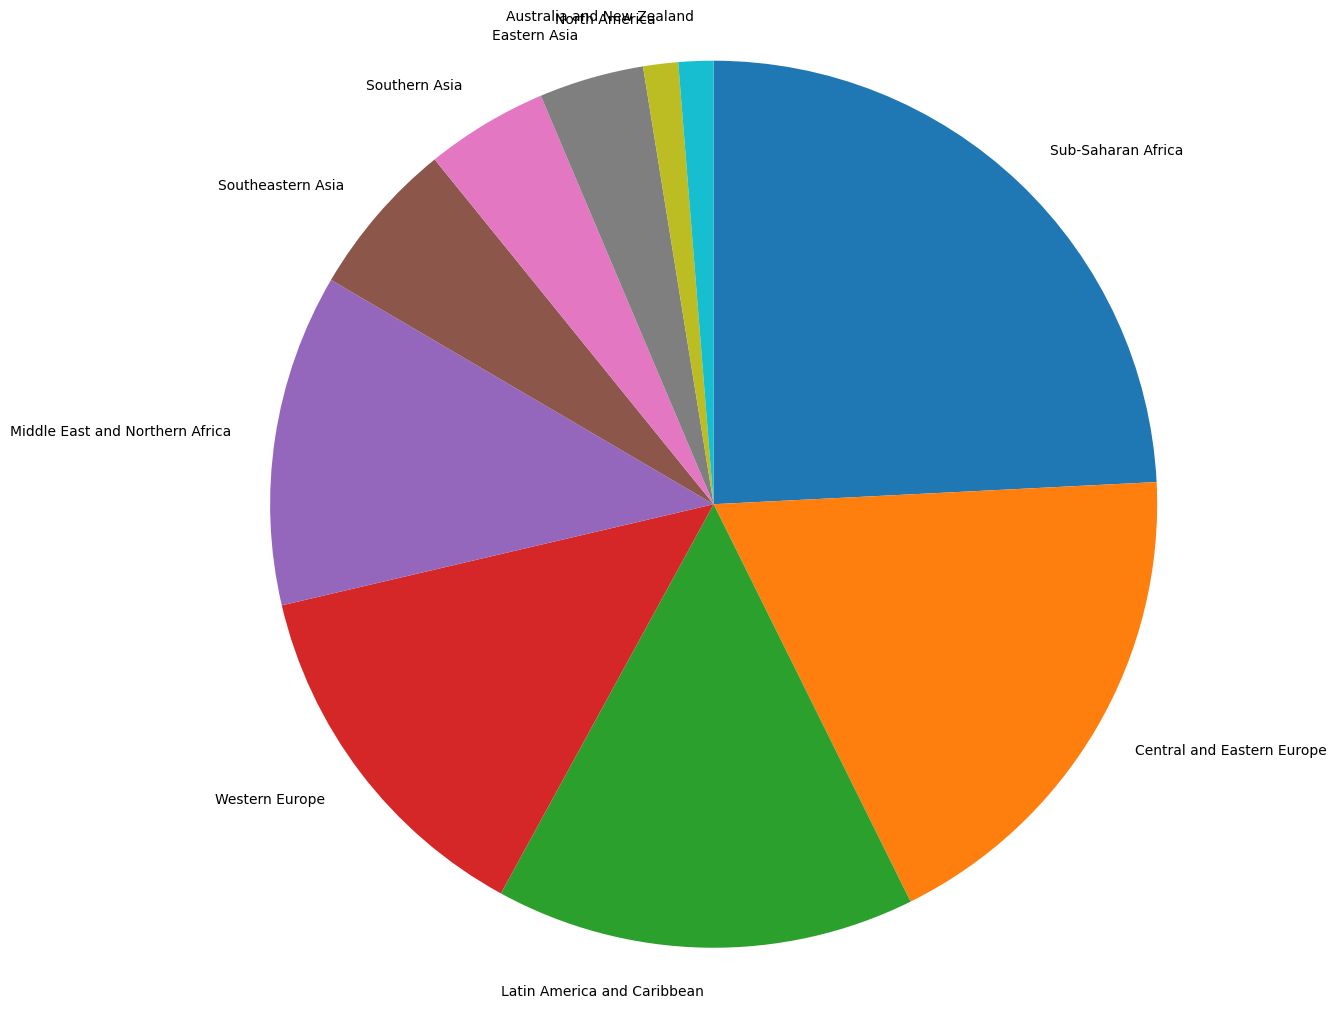

In [38]:
#shows us the number of countries in each region in our data
plt.pie(x=regions_2016.values,
        labels=regions_2016.index,
        startangle=90,
        counterclock=False,
        radius=3,
        )
plt.show()

<Axes: xlabel='Region'>

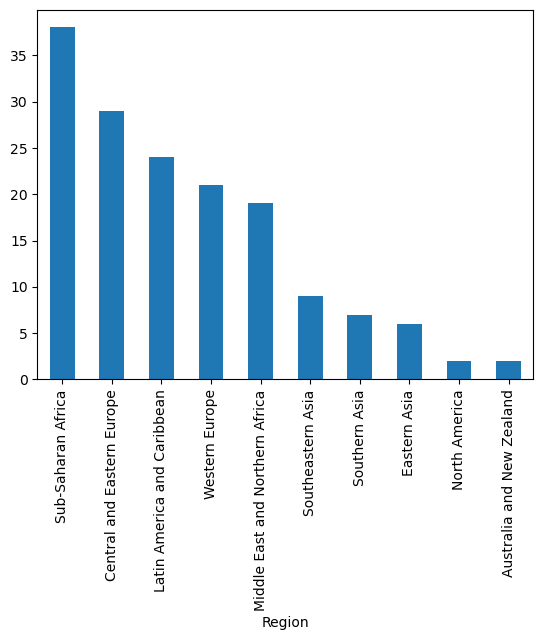

In [39]:
# plt.bar(regions_2016.index,regions_2016.values)
# plt.show()
regions_2016.plot(kind="bar")

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [40]:
score_2019 = (happiness_df["2019"]["Happiness Score"]>5).value_counts()
score_2019

Happiness Score
True     97
False    59
Name: count, dtype: int64

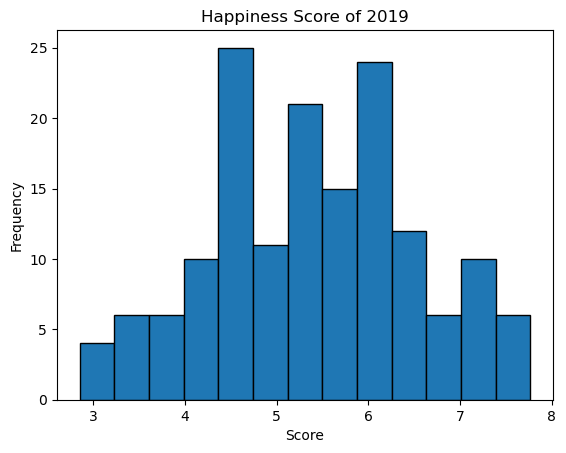

In [41]:
plt.hist(happiness_df["2019"]["Happiness Score"], edgecolor="black", bins=13)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Happiness Score of 2019")
plt.show()

In [ ]:
# score_2015 = (happiness_df["2015"]["Happiness Score"]>5).value_counts()
# score_2016 = (happiness_df["2016"]["Happiness Score"]>5).value_counts()
# score_2017 = (happiness_df["2017"]["Happiness.Score"]>5).value_counts()
# score_2018 = (happiness_df["2018"]["Score"]>5).value_counts()

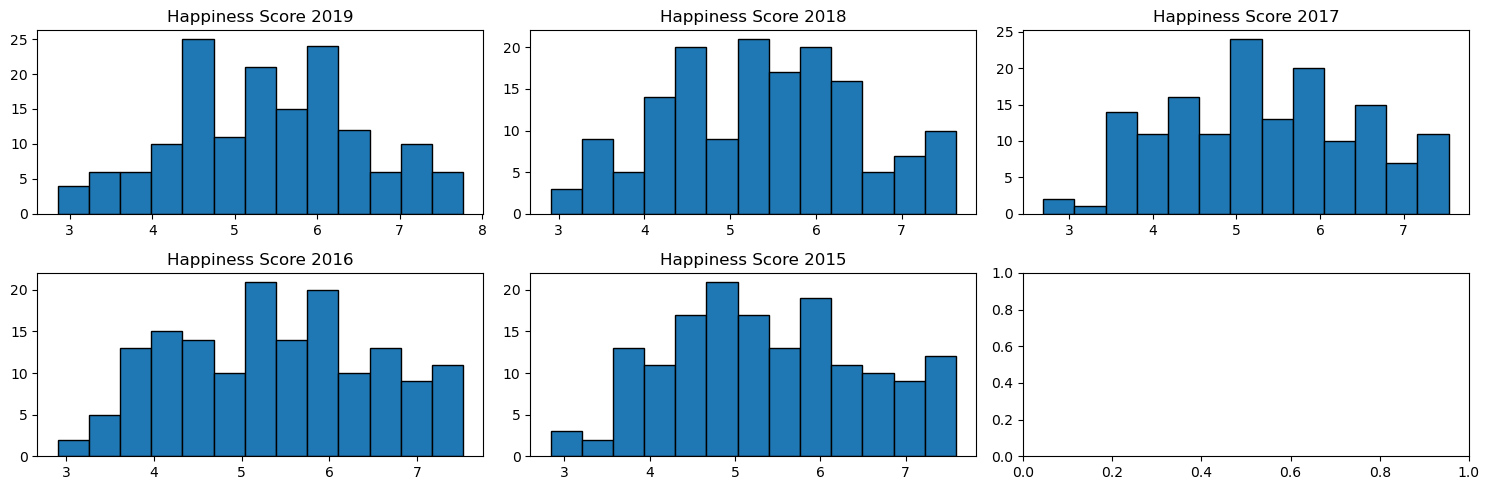

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
axes[0,0].hist(happiness_df["2019"]["Happiness Score"], edgecolor="black", bins=13)
axes[0][0].set_title('Happiness Score 2019')

axes[0,1].hist(happiness_df["2018"]["Happiness Score"], edgecolor="black", bins=13)
axes[0][1].set_title('Happiness Score 2018')

axes[0,2].hist(happiness_df["2017"]["Happiness Score"], edgecolor="black", bins=13)
axes[0][2].set_title('Happiness Score 2017')

axes[1,0].hist(happiness_df["2016"]["Happiness Score"], edgecolor="black", bins=13)
axes[1][0].set_title('Happiness Score 2016')

axes[1,1].hist(happiness_df["2015"]["Happiness Score"], edgecolor="black", bins=13)
axes[1][1].set_title('Happiness Score 2015')

plt.tight_layout()
plt.show()

In [43]:
#readability 10/10
combined_score_df = pd.DataFrame({"2015":happiness_df["2015"]["Happiness Score"],
                                  "2016":happiness_df["2016"]["Happiness Score"],
                                  "2017":happiness_df["2017"]["Happiness Score"],
                                  "2018":happiness_df["2018"]["Happiness Score"],
                                  "2019":happiness_df["2019"]["Happiness Score"]})

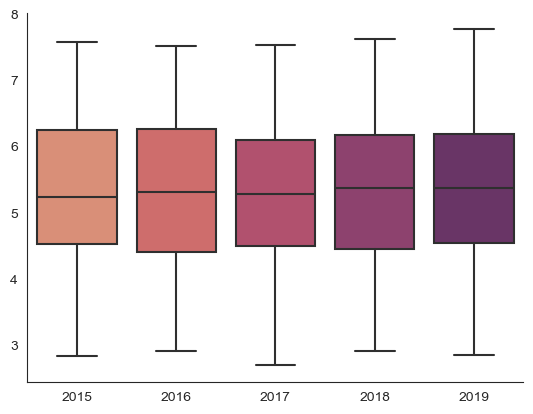

In [44]:
sns.set_style('white')
sns.boxplot(data=combined_score_df, palette='flare')
sns.despine()
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [45]:
happiness_df["2015"].describe().T
happiness_df["2016"].describe().T
happiness_df["2017"].describe().T
happiness_df["2018"].describe().T
happiness_df["2019"].describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Happiness Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
Economy (GDP per Capita),156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Health (Life Expectancy),156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Trust (Government Corruption),156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [46]:
happiness_df["2015"].describe(include='all').T
happiness_df["2016"].describe(include='all').T
happiness_df["2017"].describe(include='all').T
happiness_df["2018"].describe(include='all').T
happiness_df["2019"].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Overall rank,156.0,NaN,NaN,NaN,78.5,45.177428,1.0,39.75,78.5,117.25,156.0
Country,156,156,Finland,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Happiness Score,156.0,NaN,NaN,NaN,5.407096,1.11312,2.853,4.5445,5.3795,6.1845,7.769
Economy (GDP per Capita),156.0,NaN,NaN,NaN,0.905147,0.398389,0.0,0.60275,0.96,1.2325,1.684
Social support,156.0,NaN,NaN,NaN,1.208814,0.299191,0.0,1.05575,1.2715,1.4525,1.624
Health (Life Expectancy),156.0,NaN,NaN,NaN,0.725244,0.242124,0.0,0.54775,0.789,0.88175,1.141
Freedom to make life choices,156.0,NaN,NaN,NaN,0.392571,0.143289,0.0,0.308,0.417,0.50725,0.631
Generosity,156.0,NaN,NaN,NaN,0.184846,0.095254,0.0,0.10875,0.1775,0.24825,0.566
Trust (Government Corruption),156.0,NaN,NaN,NaN,0.110603,0.094538,0.0,0.047,0.0855,0.14125,0.453


In [47]:
#clean code 10/10
print("(",happiness_df["2015"]["Happiness Score"].mean(),",",happiness_df["2015"]["Happiness Score"].std(),")")
print("(",happiness_df["2016"]["Happiness Score"].mean(),",",happiness_df["2016"]["Happiness Score"].std(),")")
print("(",happiness_df["2017"]["Happiness Score"].mean(),",",happiness_df["2017"]["Happiness Score"].std(),")")
print("(",happiness_df["2018"]["Happiness Score"].mean(),",",happiness_df["2018"]["Happiness Score"].std(),")")
print("(",happiness_df["2019"]["Happiness Score"].mean(),",",happiness_df["2019"]["Happiness Score"].std(),")")

( 5.375734177215189 , 1.1450101349520665 )
( 5.382184713375795 , 1.1416735176005712 )
( 5.354019355773926 , 1.131230089914994 )
( 5.375916666666667 , 1.119505852731943 )
( 5.407096153846155 , 1.1131198687956712 )


In [48]:
display(happiness_df["2015"]["Happiness Score"].quantile(0.25))
display(happiness_df["2016"]["Happiness Score"].quantile(0.25))
display(happiness_df["2017"]["Happiness Score"].quantile(0.25))
display(happiness_df["2018"]["Happiness Score"].quantile(0.25))
display(happiness_df["2019"]["Happiness Score"].quantile(0.25))

4.526

4.404

4.50550007820129

4.45375

4.5445

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

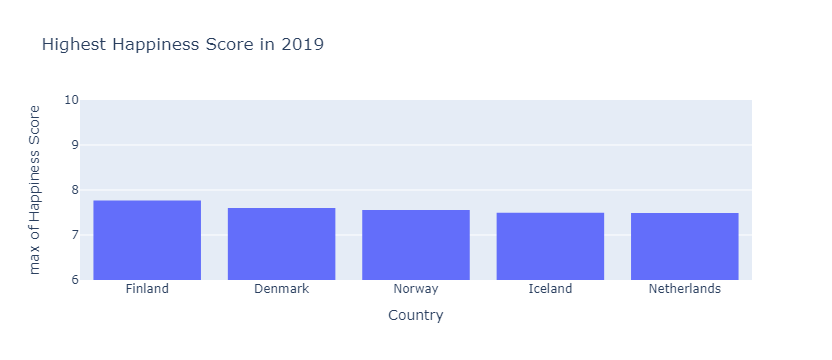

In [52]:
import plotly.express as px

df = px.data.tips()
fig = px.histogram(df, x=happiness_df["2019"]["Country"].head(5), y=happiness_df["2019"]["Happiness Score"].head(5),
                   labels={'x':'Country', "y":"Happiness Score"},
                   histfunc='max',range_y=[6,10],
                  title="Highest Happiness Score in 2019")
fig.show()

**Categorical & numerical --> (scatter plot, histogram, box plot)**

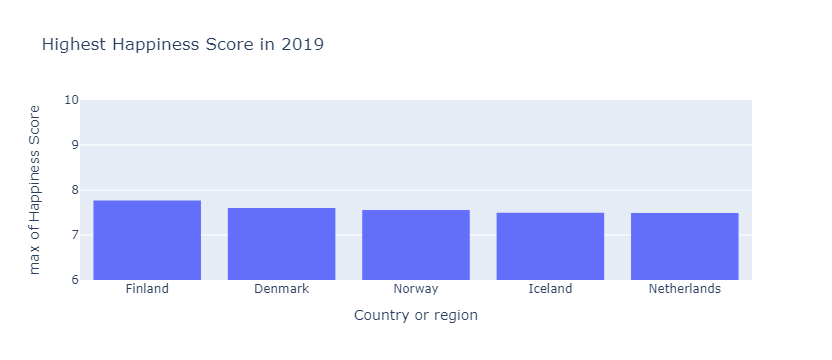

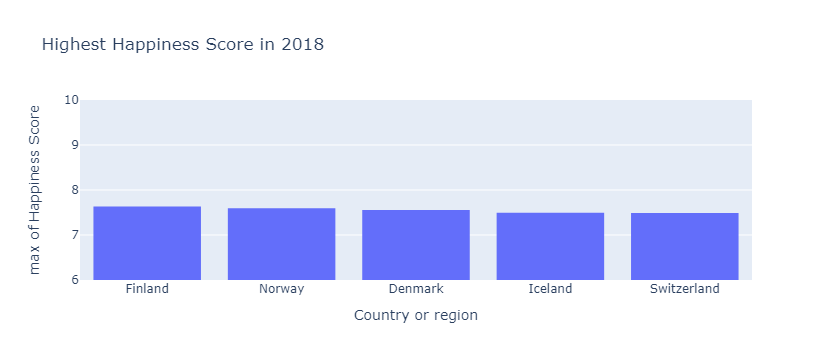

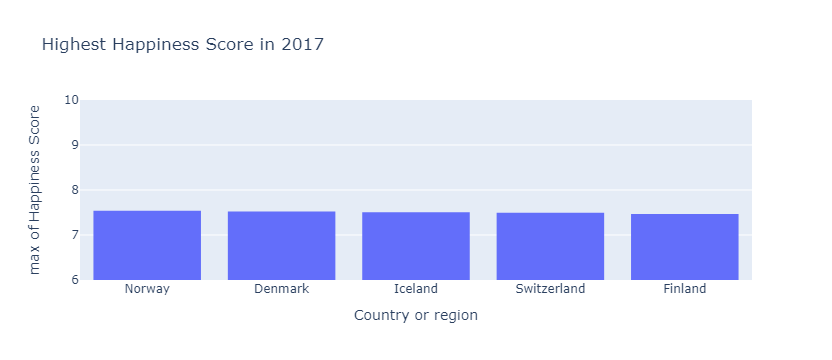

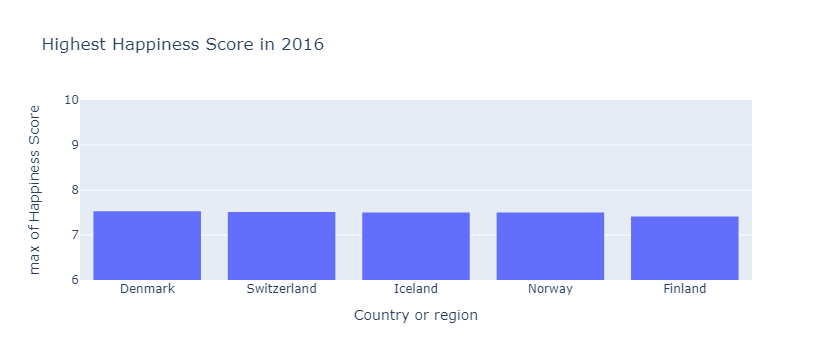

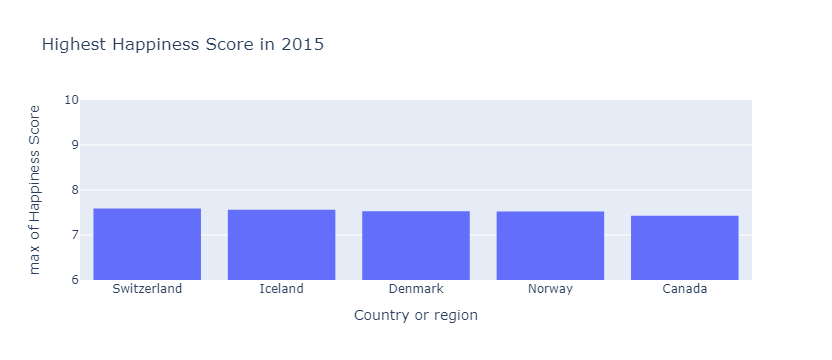

In [53]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x=happiness_df["2019"]["Country"].head(5), y=happiness_df["2019"]["Happiness Score"].head(5),
                   labels={'x':'Country or region', "y":"Happiness Score"},
                   histfunc='max',range_y=[6,10],
                  title="Highest Happiness Score in 2019")
fig.show()

fig = px.histogram(df, x=happiness_df["2018"]["Country"].head(5), y=happiness_df["2018"]["Happiness Score"].head(5),
                   labels={'x':'Country or region', "y":"Happiness Score"},
                   histfunc='max',range_y=[6,10],
                  title="Highest Happiness Score in 2018")
fig.show()

fig = px.histogram(df, x=happiness_df["2017"]["Country"].head(5), y=happiness_df["2017"]["Happiness Score"].head(5),
                   labels={'x':'Country or region', "y":"Happiness Score"},
                   histfunc='max',range_y=[6,10],
                  title="Highest Happiness Score in 2017")
fig.show()

fig = px.histogram(df, x=happiness_df["2016"]["Country"].head(5), y=happiness_df["2016"]["Happiness Score"].head(5),
                   labels={'x':'Country or region', "y":"Happiness Score"},
                   histfunc='max',range_y=[6,10],
                  title="Highest Happiness Score in 2016")
fig.show()

fig = px.histogram(df, x=happiness_df["2015"]["Country"].head(5), y=happiness_df["2015"]["Happiness Score"].head(5),
                   labels={'x':'Country or region', "y":"Happiness Score"},
                   histfunc='max',range_y=[6,10],
                  title="Highest Happiness Score in 2015")
fig.show()


**numerical & numerical --> (Scatter plot, line chart)**

In [54]:
happiness_score_df = {"2015":happiness_df["2015"][["Country","Happiness Score"]],
                     "2016":happiness_df["2016"][["Country","Happiness Score"]],
                     "2017":happiness_df["2017"][["Country","Happiness Score"]],
                     "2018":happiness_df["2018"][["Country","Happiness Score"]],
                     "2019":happiness_df["2019"][["Country","Happiness Score"]]}

In [55]:
happiness_score_df["2017"]

,Country,Happiness Score
0,Norway,7.537
1,Denmark,7.522
2,Iceland,7.504
3,Switzerland,7.494
4,Finland,7.469
...,...,...
150,Rwanda,3.471
151,Syria,3.462
152,Tanzania,3.349
153,Burundi,2.905


In [56]:
overall_Happiness_df = pd.merge(happiness_score_df["2015"],happiness_score_df["2016"], on="Country")
overall_Happiness_df = overall_Happiness_df.rename(columns={"Happiness Score_x":"Happiness Score (2015)",
                                                            "Happiness Score_y":"Happiness Score (2016)"})
overall_Happiness_df = pd.merge(overall_Happiness_df,happiness_score_df["2017"], on="Country")
overall_Happiness_df = pd.merge(overall_Happiness_df,happiness_score_df["2018"], on="Country")
overall_Happiness_df = pd.merge(overall_Happiness_df,happiness_score_df["2019"], on="Country")
overall_Happiness_df = overall_Happiness_df.rename(columns={"Happiness Score_x":"Happiness Score (2017)",
                                                            "Happiness Score_y":"Happiness Score (2018)",
                                                            "Happiness Score":"Happiness Score (2019)"})


In [57]:
tmp_Happiness_df = overall_Happiness_df
tmp_Happiness_df = tmp_Happiness_df.drop("Country", axis=1)
tmp_Happiness_df['min Happiness Score'] = tmp_Happiness_df.min(axis=1)
tmp_Happiness_df['max Happiness Score'] = tmp_Happiness_df.max(axis=1)

In [58]:
tmp_Happiness_df.drop(["Happiness Score (2015)", "Happiness Score (2016)", "Happiness Score (2017)",
                      "Happiness Score (2018)", "Happiness Score (2019)"], axis=1)
overall_Happiness_df = pd.merge(overall_Happiness_df, tmp_Happiness_df)
overall_Happiness_df["Difference in Score"] = overall_Happiness_df['max Happiness Score'] - overall_Happiness_df['min Happiness Score']

In [59]:
overall_Happiness_df = overall_Happiness_df.sort_values("Difference in Score", ascending=False, ignore_index=True)

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

In [60]:
score_2015_2016_df = overall_Happiness_df
score_2015_2016_df = score_2015_2016_df.drop(["Happiness Score (2017)", "Happiness Score (2018)", "Happiness Score (2019)",
"min Happiness Score", "max Happiness Score", "Difference in Score"], axis=1)
score_2015_2016_df

,Country,Happiness Score (2015),Happiness Score (2016)
0,Venezuela,6.810,6.084
1,Benin,3.340,3.484
2,Ivory Coast,3.655,3.916
3,Togo,2.839,3.303
4,Algeria,5.605,6.355
...,...,...,...
136,Saudi Arabia,6.411,6.379
137,Iceland,7.561,7.501
138,Ecuador,5.975,5.976
139,New Zealand,7.286,7.334


In [61]:
tmp = score_2015_2016_df
tmp = tmp.drop("Country", axis=1)
tmp['min Happiness Score'] = tmp.min(axis=1)
tmp['max Happiness Score'] = tmp.max(axis=1)
score_2015_2016_df = pd.merge(score_2015_2016_df,tmp)
score_2015_2016_df["Score change (2015-2016)"] = score_2015_2016_df['max Happiness Score'] - score_2015_2016_df['min Happiness Score']
score_2015_2016_df = score_2015_2016_df.sort_values("Score change (2015-2016)", ascending=False, ignore_index=True)
score_2015_2016_df

,Country,Happiness Score (2015),Happiness Score (2016),min Happiness Score,max Happiness Score,Score change (2015-2016)
0,Liberia,4.571,3.622,3.622,4.571,0.949
1,Algeria,5.605,6.355,5.605,6.355,0.750
2,Venezuela,6.810,6.084,6.084,6.810,0.726
3,Haiti,4.518,4.028,4.028,4.518,0.490
4,Togo,2.839,3.303,2.839,3.303,0.464
...,...,...,...,...,...,...
136,Colombia,6.477,6.481,6.477,6.481,0.004
137,Denmark,7.527,7.526,7.526,7.527,0.001
138,Ecuador,5.975,5.976,5.975,5.976,0.001
139,Bulgaria,4.218,4.217,4.217,4.218,0.001


In [62]:
score_2016_2017_df = overall_Happiness_df
score_2016_2017_df = score_2016_2017_df.drop(["Happiness Score (2015)", "Happiness Score (2018)", "Happiness Score (2019)",
"min Happiness Score", "max Happiness Score", "Difference in Score"], axis=1)
score_2016_2017_df

,Country,Happiness Score (2016),Happiness Score (2017)
0,Venezuela,6.084,5.250
1,Benin,3.484,3.657
2,Ivory Coast,3.916,4.180
3,Togo,3.303,3.495
4,Algeria,6.355,5.872
...,...,...,...
136,Saudi Arabia,6.379,6.344
137,Iceland,7.501,7.504
138,Ecuador,5.976,6.008
139,New Zealand,7.334,7.314


In [63]:
tmp = score_2016_2017_df
tmp = tmp.drop("Country", axis=1)
tmp['min Happiness Score'] = tmp.min(axis=1)
tmp['max Happiness Score'] = tmp.max(axis=1)
score_2016_2017_df = pd.merge(score_2016_2017_df,tmp)

In [64]:
score_2016_2017_df["Score change (2016-2017)"] = score_2016_2017_df['max Happiness Score'] - score_2016_2017_df['min Happiness Score']
score_2016_2017_df = score_2016_2017_df.sort_values("Score change (2016-2017)", ascending=False, ignore_index=True)
score_2016_2017_df

,Country,Happiness Score (2016),Happiness Score (2017),min Happiness Score,max Happiness Score,Score change (2016-2017)
0,Venezuela,6.084,5.250,5.250,6.084,8.340000e-01
1,Bulgaria,4.217,4.714,4.217,4.714,4.970002e-01
2,Algeria,6.355,5.872,5.872,6.355,4.829998e-01
3,Afghanistan,3.360,3.794,3.360,3.794,4.339999e-01
4,Haiti,4.028,3.603,3.603,4.028,4.250001e-01
...,...,...,...,...,...,...
136,South Korea,5.835,5.838,5.835,5.838,2.999821e-03
137,Bolivia,5.822,5.823,5.822,5.823,9.999542e-04
138,Japan,5.921,5.920,5.920,5.921,9.999237e-04
139,Burundi,2.905,2.905,2.905,2.905,2.861023e-08


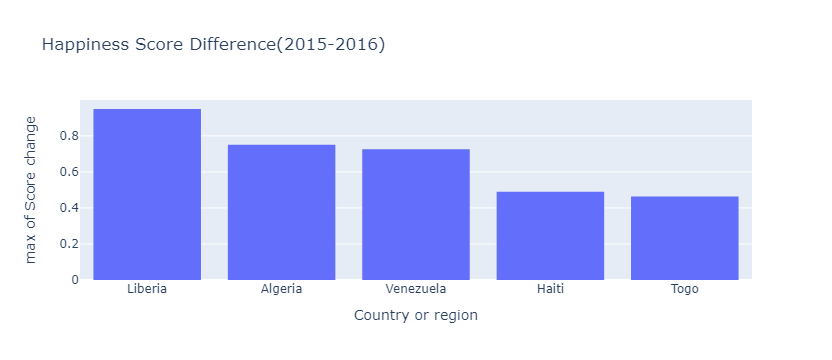

In [66]:
fig = px.histogram(df, x=score_2015_2016_df["Country"].head(5), y=score_2015_2016_df["Score change (2015-2016)"].head(5),
                   labels={'x':'Country or region', "y":"Score change"},
                   histfunc='max',
                  title="Happiness Score Difference(2015-2016)")
fig.show()

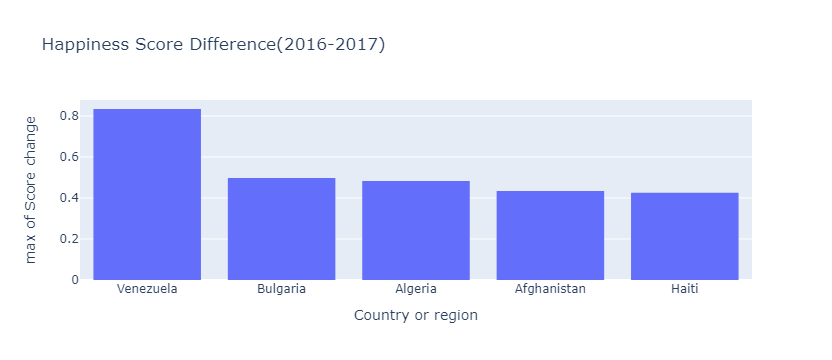

In [67]:
fig = px.histogram(df, x=score_2016_2017_df["Country"].head(5), y=score_2016_2017_df["Score change (2016-2017)"].head(5),
                   labels={'x':'Country or region', "y":"Score change"},
                   histfunc='max',
                  title="Happiness Score Difference(2016-2017)")
fig.show()

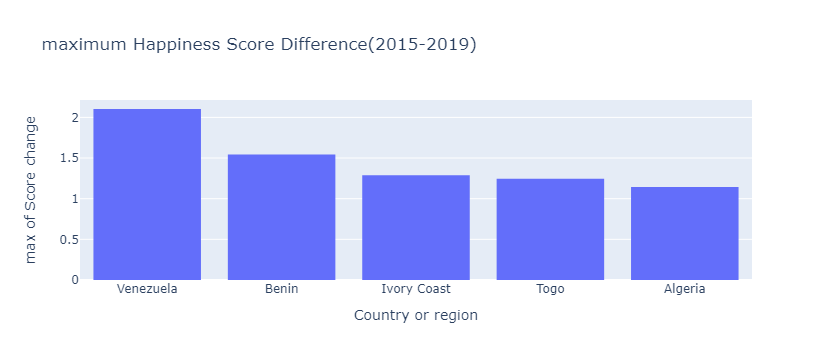

In [68]:
fig = px.histogram(df, x=overall_Happiness_df["Country"].head(5), y=overall_Happiness_df["Difference in Score"].head(5),
                   labels={'x':'Country or region', "y":"Score change"},
                   histfunc='max',
                  title="maximum Happiness Score Difference(2015-2019)")
fig.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be re

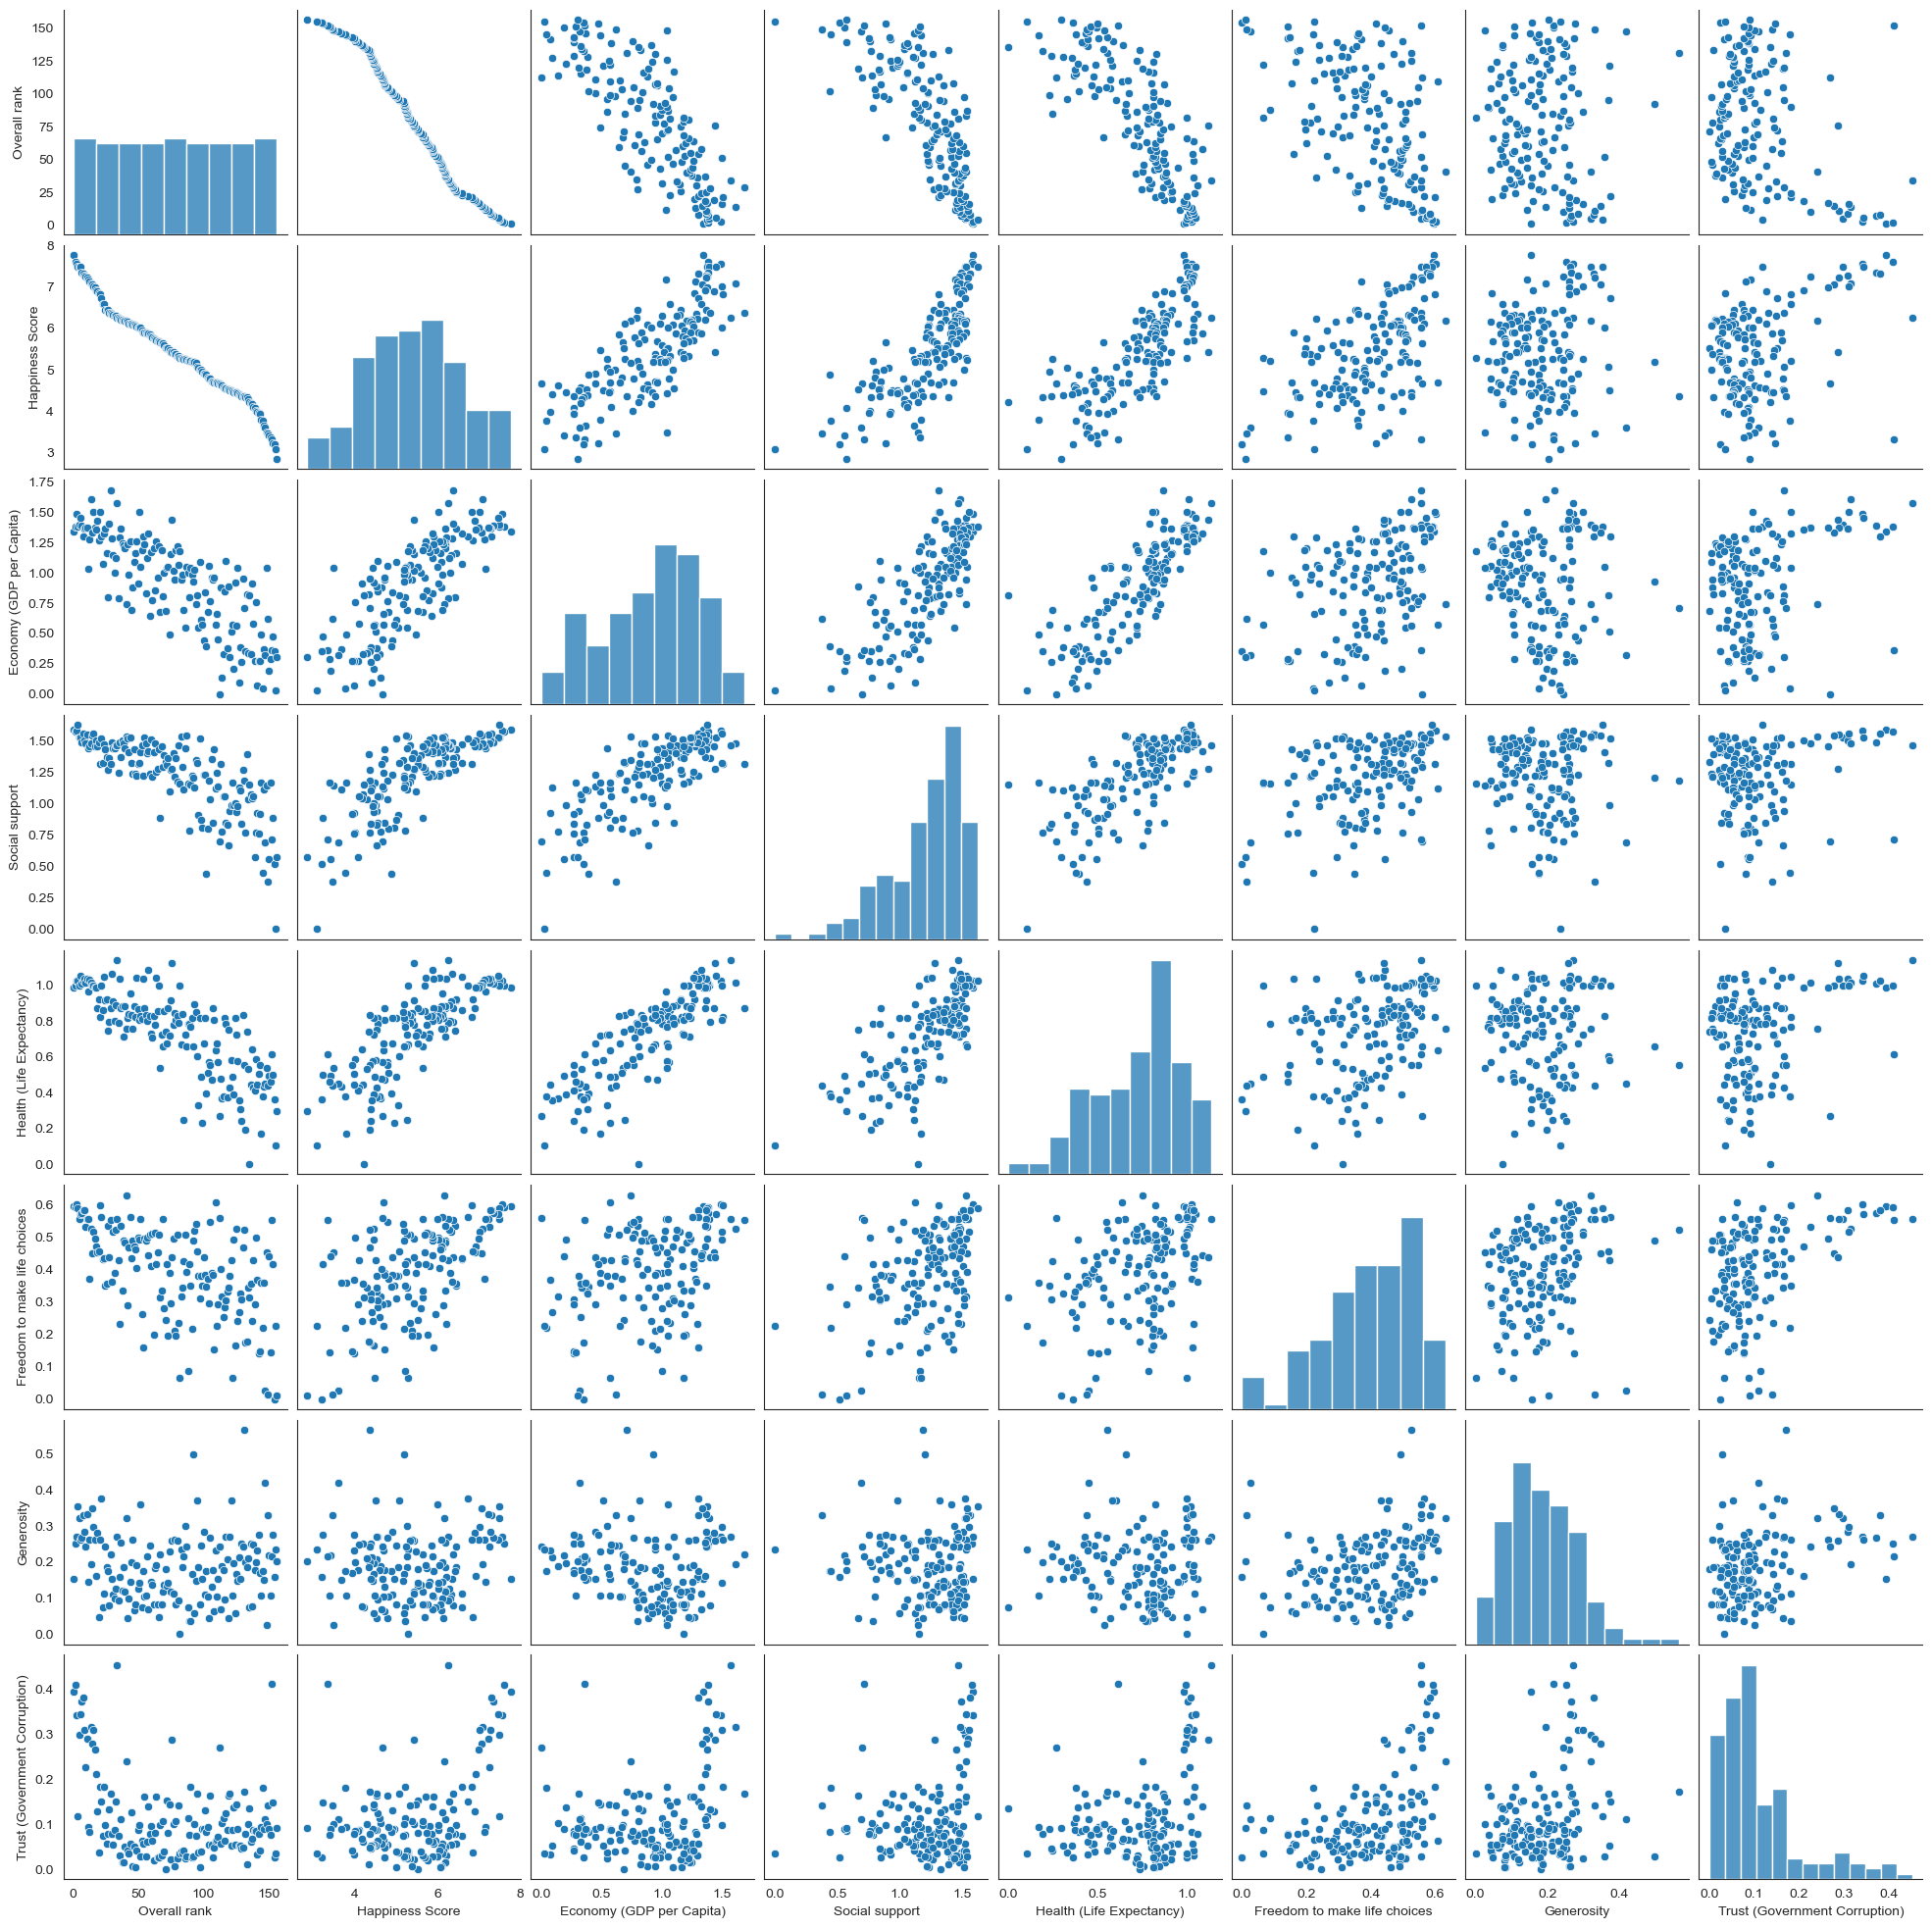

In [73]:
#this is a bonus question to answer if there are any relations between the columns
#i get an error for some reason (same with usecase 1), but the relations are still drawn bellow
sns.pairplot(happiness_df["2019"], palette='coolwarm')